## Largest FX depreciations against USD

In [38]:
# MatPlotLib settings
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from cycler import cycler
# Swan Colors
swan_colors = ['#31597F', '#7B96B0', '#C3D9E9', '#DAE1E8']
mpl.rcParams['lines.color'] = '#31597F'
mpl.rcParams['text.color'] = '#31597F'
mpl.rcParams['axes.prop_cycle'] = cycler(color=swan_colors)
mpl.rcParams['lines.linewidth'] = 1
sns.set_style('darkgrid') # darkgrid, white grid, dark, white and ticks
sns.color_palette('pastel')
plt.rc('axes', titlesize=12)
plt.rc('axes', labelsize=8)   
plt.rc('xtick', labelsize=8, color='#00305E')  
plt.rc('ytick', labelsize=8, color='#00305E')    
plt.rc('legend', fontsize=12)
plt.rc('font', size=8)          
plt.figure(figsize=(10, 4), tight_layout=True)

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

In [57]:
import pandas as pd
# Chart libraries + settings
# plt.style.use('seaborn-whitegrid')
pd.options.mode.chained_assignment = None  # default='warn' - disable some pandas warnings
pd.options.display.float_format = '{:,.2f}'.format

data = {
    'Country': ['United Kingdom', 'Mexico', 'Russia', 'Argentina', 'Iceland', 'Venezuela', 'Brazil'],
    'Currency': ['GBP', 'MXN', 'RUB', 'ARS', 'ISK', 'VEF', 'BRL'],
    'Flag': ['🇬🇧', '🇲🇽', '🇷🇺', '🇦🇷', '🇮🇸', '🇻🇪', '🇧🇷'],
    'Start Date': ['1967-11-18', '1982-08-01', '1998-08-01', '2001-01-01', '2008-01-01', '2018-01-01', '1999-01-12'],
    'End Date': ['1967-11-18', '1983-01-01', '1998-09-01', '2002-12-31', '2008-12-31', '2018-08-20', '1999-03-12'],
    'Start Level': [2.40, 26.20, 6.29, 1.00, 62.84, 10.00, 1.21],
    'End Level': [2.80, 129.70, 21.00, 3.95, 129.44, 6_000_000, 2.14]
}

btc_price = 27300
df = pd.DataFrame(data)
# df = df[df.Country != 'Venezuela']

def to_days(x):
    return x.days

df['Start Date'] = pd.to_datetime(df['Start Date'])
df['End Date'] = pd.to_datetime(df['End Date'])
df['days'] = df['End Date'] - df['Start Date']
df['change'] = df['End Level']/df['Start Level']
df['BTC_price_start'] = btc_price
df['BTC_price_end'] = btc_price * df['change']
df['d'] = df['days'].apply(to_days)

display(df)

,Country,Currency,Flag,Start Date,End Date,Start Level,End Level,days,change,BTC_price_start,BTC_price_end,d
0,United Kingdom,GBP,🇬🇧,1967-11-18,1967-11-18,2.40,2.80,0 days,1.17,27300,"31,850.00",0
1,Mexico,MXN,🇲🇽,1982-08-01,1983-01-01,26.20,129.70,153 days,4.95,27300,"135,145.42",153
2,Russia,RUB,🇷🇺,1998-08-01,1998-09-01,6.29,21.00,31 days,3.34,27300,"91,144.67",31
3,Argentina,ARS,🇦🇷,2001-01-01,2002-12-31,1.00,3.95,729 days,3.95,27300,"107,835.00",729
4,Iceland,ISK,🇮🇸,2008-01-01,2008-12-31,62.84,129.44,365 days,2.06,27300,"56,233.48",365
5,Venezuela,VEF,🇻🇪,2018-01-01,2018-08-20,10.00,"6,000,000.00",231 days,"600,000.00",27300,"16,380,000,000.00",231
6,Brazil,BRL,🇧🇷,1999-01-12,1999-03-12,1.21,2.14,59 days,1.77,27300,"48,282.64",59


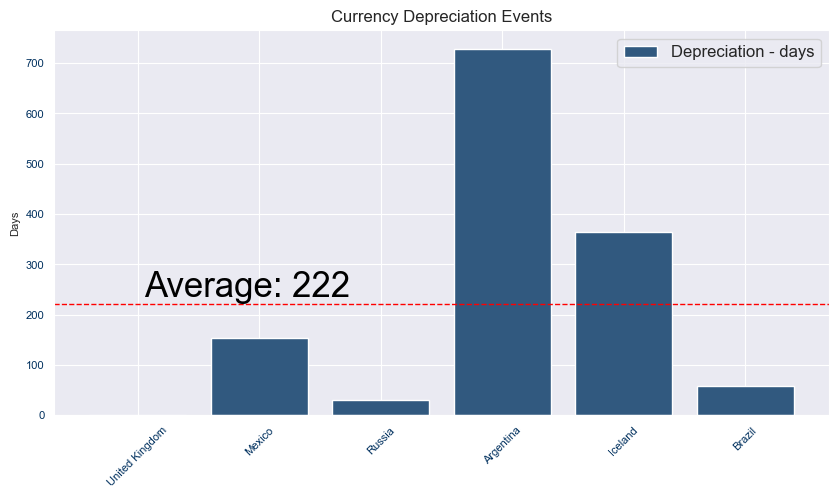

In [56]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

fig, ax = plt.subplots(figsize=(10, 5))

ax.bar(df['Country'], df['d'], label='Depreciation - days')

ax.set_ylabel('Days')
ax.set_title('Currency Depreciation Events')
ax.legend()
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

# Add horizontal line and label for average value
avg_value = np.mean(df['days']).days
ax.axhline(avg_value, color='r', linestyle='--')
ax.text(0.05, avg_value, f'Average: {avg_value:,.0f}', color='black', fontsize=25, va='bottom')

plt.xticks(rotation=45)

plt.show()

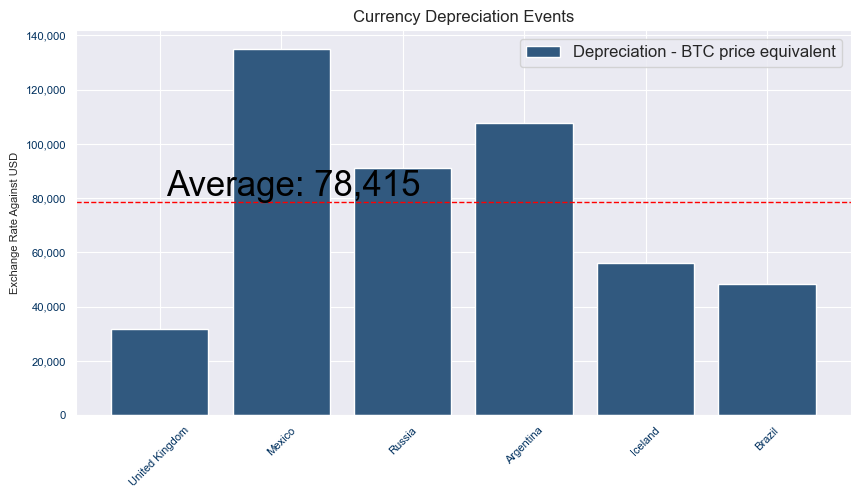

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

fig, ax = plt.subplots(figsize=(10, 5))

ax.bar(df['Country'], df['BTC_price_end'], label='Depreciation - BTC price equivalent')

ax.set_ylabel('Exchange Rate Against USD')
ax.set_title('Currency Depreciation Events')
ax.legend()
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

# Add horizontal line and label for average value
avg_value = np.mean(df['BTC_price_end'])
ax.axhline(avg_value, color='r', linestyle='--')
ax.text(0.05, avg_value, f'Average: {avg_value:,.0f}', color='black', fontsize=25, va='bottom')

plt.xticks(rotation=45)

plt.show()